In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler

Predicciones LDA: ['A' 'A' 'B' 'B' 'B' 'A']
Predicciones QDA: ['A' 'B' 'B' 'B' 'B' 'A']
Predicciones Naive Bayes: ['A' 'A' 'C' 'B' 'B' 'A']


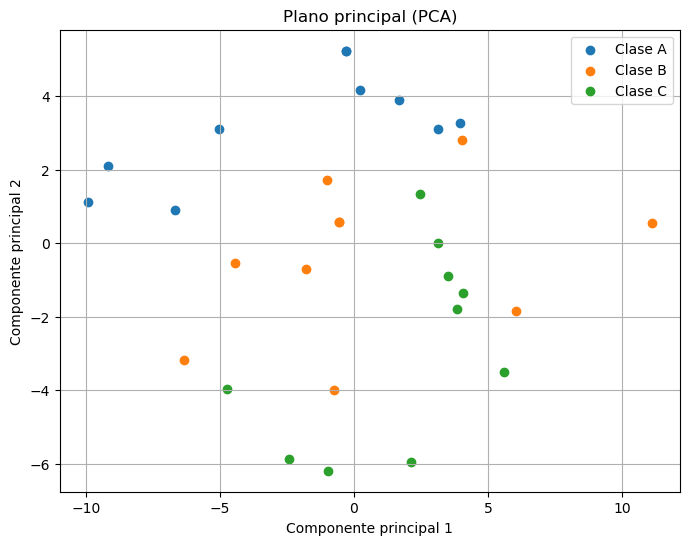

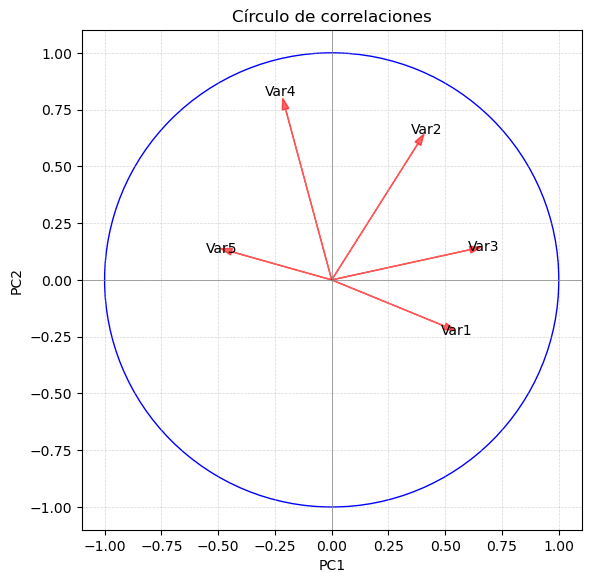

In [2]:
from Ejercicio_2_practicos import analisis_predictivo

# Cargar el archivo con el separador correcto
df = pd.read_csv("Ejemplo_AD.csv", sep=";", header=None)
#print(df)

# Eliminar columnas que no se usan, siendo la primera y la ultima que tiene NaN
df = df.drop(df.columns[7], axis=1)
df = df.drop(df.columns[0], axis=1)

# Asignar nombres de columna
df.columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'Clase']


X = df[['V1', 'V2', 'V3', 'V4', 'V5']].values
y = df['Clase'].values

modelo = analisis_predictivo(X, y)
modelo.split_data()  # 20% para prueba

pred_lda = modelo.predecir_lda()
print("Predicciones LDA:", pred_lda)

pred_qda = modelo.predecir_qda()
print("Predicciones QDA:", pred_qda)

pred_nb = modelo.predecir_naive_bayes()
print("Predicciones Naive Bayes:", pred_nb)

modelo.graficar_plano_principal()
modelo.graficar_circulo_correlaciones()  

In [3]:
from Ejercicio_2_de_python import correr_encapsular

lda_pred, qda_pred, nb_pred = correr_encapsular()

print("Predicciones LDA:", lda_pred.tolist())
print("Predicciones QDA:", qda_pred.tolist())
print("Predicciones Naive Bayes:", nb_pred.tolist())


Predicciones LDA: ['A', 'A', 'B', 'B', 'B', 'A']
Predicciones QDA: ['A', 'B', 'C', 'B', 'B', 'A']
Predicciones Naive Bayes: ['A', 'A', 'C', 'B', 'B', 'A']


In [3]:
from Ejercicio_4 import correr_ejer_4

y_test, lda_pred, qda_pred, naive_pred = correr_ejer_4()


# LDA
print("Exactitud del LDA:", accuracy_score(y_test, lda_pred))
matriz_lda = confusion_matrix(y_test, lda_pred)
print("Matriz de Confusión LDA:")
print(matriz_lda)
presicion_lda_clase = precision_score(y_test, lda_pred, average=None, zero_division=0)
print("Precisión por clase LDA:", presicion_lda_clase)
print("------------------------- \n")

# QDA
print("Exactitud del QDA:", accuracy_score(y_test, qda_pred))
matriz_qda = confusion_matrix(y_test, qda_pred)
print("Matriz de Confusión QDA:")
print(matriz_qda)
presicion_qda_clase = precision_score(y_test, qda_pred, average=None, zero_division=0)
print("Precisión por clase QDA:", presicion_qda_clase)
print("------------------------- \n")

# Naive Bayes
print("Exactitud del Naive Bayes:", accuracy_score(y_test, naive_pred))
matriz_naive = confusion_matrix(y_test, naive_pred)
print("Matriz de Confusión Naive Bayes:")
print(matriz_naive)
presicion_naive_clase = precision_score(y_test, naive_pred, average=None, zero_division=0)
print("Precisión por clase Naive Bayes:", presicion_naive_clase)

Exactitud del LDA: 0.7873462214411248
Matriz de Confusión LDA:
[[125  70]
 [ 51 323]]
Precisión por clase LDA: [0.71022727 0.82188295]
------------------------- 

Exactitud del QDA: 0.6994727592267135
Matriz de Confusión QDA:
[[168  27]
 [144 230]]
Precisión por clase QDA: [0.53846154 0.89494163]
------------------------- 

Exactitud del Naive Bayes: 0.6748681898066784
Matriz de Confusión Naive Bayes:
[[174  21]
 [164 210]]
Precisión por clase Naive Bayes: [0.5147929  0.90909091]


C:\Users\AMADOR\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [5]:
from Ejercicio_4 import evaluar_metricas

# Obtener predicciones

# Evaluar
resultados = []
resultados.append(evaluar_metricas("LDA", y_test, lda_pred))
resultados.append(evaluar_metricas("QDA", y_test, qda_pred))
resultados.append(evaluar_metricas("Naive Bayes", y_test, naive_pred))

# Crear el DataFrame con los resultados
df_resultados = pd.DataFrame(resultados)
df_resultados


Modelo  Precisión Global  Error Global  Precisión Positiva (PP)  \
0          LDA            0.7836        0.2164                   0.8219   
1          QDA            0.7728        0.2272                   0.8949   
2  Naive Bayes            0.7740        0.2260                   0.9091   

   Precisión Negativa (PN)  
0                   0.7102  
1                   0.5385  
2                   0.5148